### Exploración de features. Gonzalo: ap_hi, ap_lo, cholesterol y gluc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Health Screening Data.csv', index_col= None)

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'AgeinYr', 'BMI', 'BMICat', 'AgeGroup'],
      dtype='object')

In [4]:
data = data.drop(columns=['Unnamed: 0', 'id',])

In [5]:
selection = data[['ap_hi','ap_lo', 'cholesterol', 'gluc']]

In [6]:
selection.isnull().sum()

ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
dtype: int64

In [7]:
selection.describe()

,ap_hi,ap_lo,cholesterol,gluc
count,69960.000000,69960.000000,69960.000000,69960.000000
mean,126.681089,96.647642,1.366852,1.226487
std,18.205557,188.523437,0.680280,0.572285
min,-150.000000,-70.000000,1.000000,1.000000
25%,120.000000,80.000000,1.000000,1.000000
50%,120.000000,80.000000,1.000000,1.000000
75%,140.000000,90.000000,2.000000,1.000000
max,240.000000,11000.000000,3.000000,3.000000


#### Presion Arterial: ap_hi, ap_lo

##### TAS, hay 189 valores en el extremo inferior que no son reales(menores a 70 mmHg). No hay valores anormales en el extremo superior

In [8]:
# ap_hi. 
total_rows = selection.shape[0]
cant_ap_hi = selection.ap_hi[selection.ap_hi>=70].count()
print(f' de un total de {total_rows} filas, {cant_ap_hi} \
tienen valores reales(mayores a 70 mmHg), {total_rows-cant_ap_hi}')

 de un total de 69960 filas, 69771 tienen valores reales(mayores a 70 mmHg), 189


In [9]:
selection.ap_hi[selection.ap_hi>=70].sort_values().tail(15)

4978     220
50979    220
10380    220
28124    220
1328     220
35354    220
62553    220
44741    230
42702    240
29639    240
55980    240
67672    240
26041    240
69290    240
32545    240
Name: ap_hi, dtype: int64

70 240


/home/gonza_garcia/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_hi'>

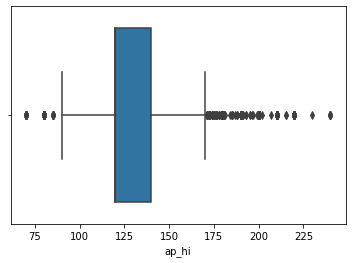

In [10]:
print(selection.ap_hi[selection.ap_hi>=70].min(), selection.ap_hi[selection.ap_hi>=70].max())
sns.boxplot(selection.ap_hi[selection.ap_hi>=70])

In [11]:
# Analisis del las filas con valores menores a 85 mmHg
selection.ap_hi[selection.ap_hi<70].unique()


array([  14,   11,   12,   10,   16, -100,    7,   15,   17,    1,   13,
         60, -115,   20, -140, -120, -150,   24])

#### TAD: en el rango inferior hay 69 filas con valores no reales(<40 mmHg) y 1015 filas en el rango superior(>130 mmHg)

In [12]:
cant_ap_lo = selection.ap_lo[selection.ap_lo>40].count()
print(f' de un total de {total_rows} filas, {cant_ap_lo} tienen valores reales(mayores a 40 mmHg)\
    {total_rows-cant_ap_lo}')

 de un total de 69960 filas, 69891 tienen valores reales(mayores a 40 mmHg)    69


In [13]:
cant_ap_lo2 = selection.ap_lo[selection.ap_lo<=130].count()
print(f' de un total de {total_rows} filas, {cant_ap_lo2} tienen valores reales(menores a 130 mmHg)\
    {total_rows-cant_ap_lo2}')

 de un total de 69960 filas, 68945 tienen valores reales(menores a 130 mmHg)    1015


In [14]:
print(selection.ap_lo[(selection.ap_lo>40) & (selection.ap_lo<130)].min(),\
    selection.ap_lo[(selection.ap_lo>40) & (selection.ap_lo<130)].max())

45 126


/home/gonza_garcia/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ap_lo'>

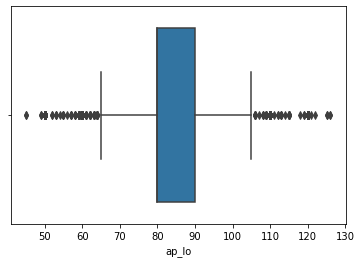

In [15]:
sns.boxplot(selection.ap_lo[(selection.ap_lo>40) & (selection.ap_lo<130)])

In [16]:
# Analisis de los valores de TAD fuera de rango
TAD_ofrange = selection.ap_lo[~((selection.ap_lo>40) & (selection.ap_lo<130))]
TAD_ofrange.unique()

array([ 1100,  1000,   800,    30,  1033,   150,    40,  1001,  1200,
       10000,  8044,   140,  1044,   170,   160,   130,  9100,    10,
         902,     8,  1008,  2088,    20,   802,  8000,  1022,   850,
         708,  9011,  1011,     0,  1007,  1177,  7100,   709,  8500,
        1110,  8099,  1088,  1077,  1120,     7,  1125,   180,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   801,
        1002,     1,   182,   810,     9,  7099, 11000,  9800,  8200,
        1139,   820,  1400,   190,   900,  6800,   135,   700,    15,
        1101,   910,  1140,  1211,   -70,  8077,   901,   880,   870,
         585,   602])

#### Presión de pulso   [explicación](https://en.wikipedia.org/wiki/Pulse_pressure#Relationship_to_heart_disease)

In [17]:
new_selection = selection[(selection.ap_hi>=70) & ((selection.ap_lo>40) & (selection.ap_lo<130))]

In [19]:
new_selection['PP'] = new_selection.ap_hi - new_selection.ap_lo

/tmp/ipykernel_14342/3525000272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_selection['PP'] = new_selection.ap_hi - new_selection.ap_lo


In [20]:
new_selection

,ap_hi,ap_lo,cholesterol,gluc,PP
0,110,80,1,1,30
1,140,90,3,1,50
2,130,70,3,1,60
3,150,100,1,1,50
4,100,60,1,1,40
...,...,...,...,...,...
69955,120,80,1,1,40
69956,140,90,2,2,50
69957,180,90,3,1,90
69958,135,80,1,2,55


count    68665.000000
mean        45.293993
std         11.826899
min        -50.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: PP, dtype: float64


/home/gonza_garcia/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PP'>

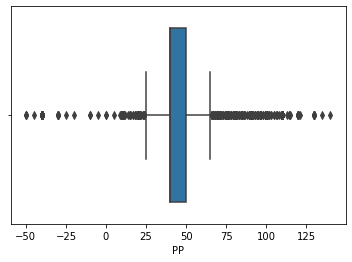

In [25]:
print(new_selection.PP.describe())
sns.boxplot(new_selection.PP)

#### Colesterol, es una variable categórica de tres niveles. No sabemos exactamente a qué responden cada una.
[Tres categorias de colesterol total](https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/)

In [92]:
selection.cholesterol.unique()

array([1, 3, 2])

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

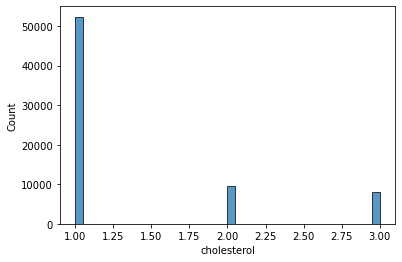

In [96]:

sns.histplot(selection.cholesterol)

In [102]:
col_normal = selection.cholesterol[selection.cholesterol ==1].count()
col_patol = selection.cholesterol[~(selection.cholesterol ==1)].count()

In [105]:
print(col_normal, col_patol)

52358 17602


#### Glucemia: es una variable categorica de tres niveles. No sabemos a qué corresponde cada uno. Podria ser no diabetes, pre diabetes y diabetes. [Será esta clasficiacion?](https://dtc.ucsf.edu/es/tipos-de-diabetes/diabetes-tipo-1/comprension-de-la-diabetes-tipo-1/datos-basicos/diagnostico-de-la-diabetes/)

In [107]:
selection.gluc.unique()

array([1, 2, 3])

In [108]:
selection.gluc.value_counts()

1    59443
3     5328
2     5189
Name: gluc, dtype: int64

<AxesSubplot:xlabel='gluc', ylabel='Count'>

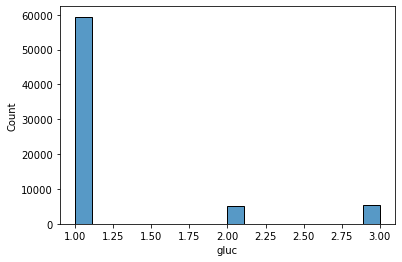

In [109]:
sns.histplot(selection.gluc)